In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-1, 1],
    c1 = [0.1, 2.0],
    c2 = [0.5, 2.0],
    w = 1.2,
    w_decay = 0.95))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

update local, 0.6432726851133542
Iteration 93/300: 	0.6073135661187573
update local, 0.7150001882392669
update global 0.6073135661187573
update local, 0.6441127028420707
update local, 0.6172421892112661
Iteration 94/300: 	0.6073135661187573
update local, 0.7151924204603534
update global 0.6073135661187573
update local, 0.7619340130101855
update local, 0.7345012771749051
Iteration 95/300: 	0.6073135661187573
update local, 0.6618043418242553
update global 0.6073135661187573
update local, 0.661703448429286
Iteration 96/300: 	0.6073135661187573
update local, 0.6779039329457506
update global 0.6073135661187573
Iteration 97/300: 	0.6073135661187573
update global 0.6073135661187573
update local, 0.7183722380165741
update local, 0.7094622460481163
update local, 0.6896714540285485
Iteration 98/300: 	0.6073135661187573
update global 0.6073135661187573
update local, 0.6111331119715611
update local, 0.654271348614559
update local, 0.721055717111748
update local, 0.6652808501341633
Iteration 99/300

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573, 0.6073135661187573,

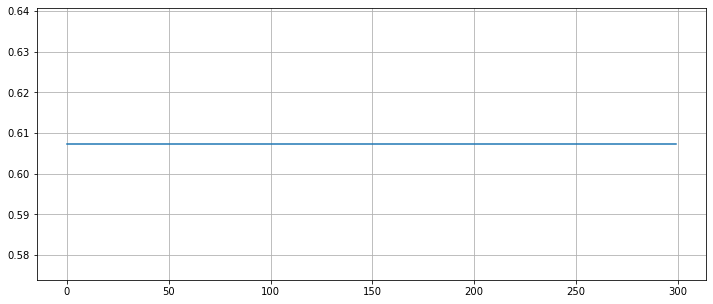

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.58123815 0.3242342  0.09452761]
[0. 1. 0.] <-> [0.2347978  0.75685024 0.00835192]
[1. 0. 0.] <-> [0.41732624 0.14034219 0.44233158]
[0. 0. 1.] <-> [0.2853975  0.04954647 0.665056  ]
[1. 0. 0.] <-> [0.49753156 0.43708262 0.06538574]
[1. 0. 0.] <-> [0.5212744  0.42583066 0.05289498]
[1. 0. 0.] <-> [0.5212006  0.33644372 0.14235568]
[1. 0. 0.] <-> [0.5152078  0.42612606 0.05866608]
[0. 0. 1.] <-> [0.29290074 0.05254125 0.65455806]
[1. 0. 0.] <-> [0.47584194 0.47553182 0.04862624]
[1. 0. 0.] <-> [0.49113223 0.45852724 0.05034062]
[0. 0. 1.] <-> [0.32065183 0.0713255  0.6080227 ]
[1. 0. 0.] <-> [0.5431589  0.38791758 0.06892345]
[0. 1. 0.] <-> [0.42829937 0.5358403  0.03586032]
[0. 1. 0.] <-> [0.5052759  0.45251846 0.04220559]
[1. 0. 0.] <-> [0.51840377 0.42751938 0.0540769 ]
[1. 0. 0.] <-> [0.5791901  0.34009126 0.08071863]
[0. 0. 1.] <-> [0.35647583 0.09803892 0.54548526]
[1. 0. 0.] <-> [0.5079769  0.43577966 0.05624353]
[0. 1. 0.] <-> [0.5410921  0.412472   0.04643585]
